[2019-02-14 23:12:32.156503] Url Request Success
중국_201101 : 113927
[2019-02-14 23:12:32.179478] Url Request Success
중국_201102 : 157019
[2019-02-14 23:12:32.210574] Url Request Success
중국_201103 : 163261
[2019-02-14 23:12:32.240233] Url Request Success
중국_201104 : 153875
[2019-02-14 23:12:32.269159] Url Request Success
중국_201105 : 152347
[2019-02-14 23:12:32.306100] Url Request Success
중국_201106 : 179508
[2019-02-14 23:12:32.374010] Url Request Success
중국_201107 : 244573
[2019-02-14 23:12:32.411775] Url Request Success
중국_201108 : 276299
[2019-02-14 23:12:32.443689] Url Request Success
중국_201109 : 231462
[2019-02-14 23:12:32.476601] Url Request Success
중국_201110 : 214681
[2019-02-14 23:12:32.515500] Url Request Success
중국_201111 : 174164
[2019-02-14 23:12:32.545420] Url Request Success
중국_201112 : 159080
[2019-02-14 23:12:32.575338] Url Request Success
중국_201201 : 167022
[2019-02-14 23:12:32.613236] Url Request Success
중국_201202 : 173790
[2019-02-14 23:12:32.651290] Url Request Success

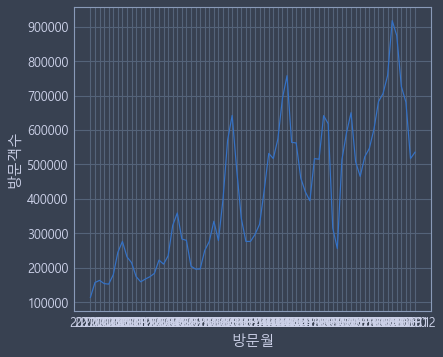

In [6]:
import os
import sys
import urllib.request
import datetime
import time
import json
from config import *

import matplotlib.pyplot as plt
import matplotlib
from matplotlib import font_manager, rc
from jupyterthemes import jtplot
jtplot.style(theme = "oceans16")

def get_request_url(url):
    
    req = urllib.request.Request(url)
    
    try: 
        response = urllib.request.urlopen(req)
        if response.getcode() == 200:
            print ("[%s] Url Request Success" % datetime.datetime.now())
            return response.read().decode('utf-8')
    except Exception as e:
        print(e)
        print("[%s] Error for URL : %s" % (datetime.datetime.now(), url))
        return None

#[CODE 1]

def getNatVisitor(yyyymm, nat_cd, ed_cd):
    
    end_point = "http://openapi.tour.go.kr/openapi/service/EdrcntTourismStatsService/getEdrcntTourismStatsList"
    access_key = "TIyuV2FHFQSS46wIlsJNrwYGs9SqQEDOtNb0XZjVWp8k6pVUitI9BsXYzNGEYhUmLuovIzoeoIEA3fbXwqQwTg%3D%3D"
    parameters = "?_type=json&serviceKey=" + access_key
    parameters += "&YM=" + yyyymm
    parameters += "&NAT_CD=" + nat_cd
    parameters += "&ED_CD=" + ed_cd
    
    url = end_point + parameters
    
    retData = get_request_url(url)
    
    if (retData == None):
        return None
    else:
        return json.loads(retData)

def main():

    jsonResult = []

    #중국: 112 / 일본: 130 / 미국: 275

    national_code = "112"
    ed_cd = "E"

    nStartYear = 2011
    nEndYear = 2017

    for year in range(nStartYear, nEndYear):
        for month in range(1, 13):

            yyyymm = "{0}{1:0>2}".format(str(year), str(month))

            jsonData = getNatVisitor(yyyymm, national_code, ed_cd)
    
            if (jsonData['response']['header']['resultMsg'] == 'OK'):
                krName = jsonData['response']['body']['items']['item']["natKorNm"]
                krName = krName.replace(' ', '')
                iTotalVisit = jsonData['response']['body']['items']['item']["num"]
                print('%s_%s : %s' %(krName, yyyymm, iTotalVisit))
                jsonResult.append({'nat_name': krName, 'nat_cd': national_code,
                                 'yyyymm': yyyymm, 'visit_cnt': iTotalVisit})

    cnVisit = []
    VisitYM = []
    index = []
    i = 0
    for item in jsonResult:
        index.append(i)
        cnVisit.append(item['visit_cnt'])
        VisitYM.append(item['yyyymm'])
        i = i + 1
            
    with open('%s(%s)_해외방문객정보_%d_%d.json' % (krName, national_code, nStartYear, nEndYear-1), 'w', encoding='utf8') as outfile:
        retJson = json.dumps(jsonResult,
                        indent=4, sort_keys=True,
                        ensure_ascii=False)
        outfile.write(retJson)
    

    #[CODE 2]

    font_location = "c:/Windows/fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=font_location).get_name()
    matplotlib.rc('font', family=font_name)

    plt.xticks(index, VisitYM)
    plt.plot(index, cnVisit)
    plt.xlabel('방문월')
    plt.ylabel('방문객수')
    plt.grid(True)
    plt.show()           
    
if __name__ == '__main__':
    main()